In [4]:
import sys
!"$sys.executable" -m pip install pandas

  Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip


In [24]:
%pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.0 MB/s eta 0:00:001.6 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
%pip install plotly

  Using cached plotly-6.4.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.11.0-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.4.0-py3-none-any.whl (9.9 MB)
Using cached narwhals-2.11.0-py3-none-any.whl (423 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install wordcloud matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 71.7 kB/s eta 0:00:0031m70.2 kB/s eta 0:00:04m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.0 kB/s eta 0:00:00 kB/s eta 0:00:03:10

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import plotly.express as px
import plotly.io as pio
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [72]:
raw = pd.read_csv(
    '/Users/giorgiaquarta/Documents/lyrics.csv',
    delimiter=':',
    header=None,
    names=['album_id', 'track_id', 'line_n', 'part', 'lyric']
)

In [73]:
group_lyric = (
    raw.groupby(['album_id', 'track_id'])['lyric'].apply(lambda lines: " ".join(lines)).reset_index()
)
group_lyric.head(20)

,album_id,track_id,lyric
0,EVE,1,I'm like the water when your ship rolled in th...
1,EVE,2,You booked the night train for a reason So you...
2,EVE,3,"Gleaming, twinkling Eyes like sinking Ships on..."
3,EVE,4,If I wanted to know who you were hanging with ...
4,EVE,5,I sit and watch you readin' with your head low...
5,EVE,6,He did it He did it Este's a friend of mine We...
6,EVE,7,"Honey, when I'm above the trees I see this for..."
7,EVE,8,"Hey, Dorothea, do you ever stop and think abou..."
8,EVE,9,Break my soul in two looking for you But you'r...
9,EVE,10,How's one to know? I'd meet you where the spir...


In [74]:
album_table = pd.read_csv (
    '/Users/giorgiaquarta/Desktop/SwiftLyrics_Analytics/dataset/albums.csv',
    delimiter= ';'
)
album_table = album_table.drop(['SubTitle','LowestFqWord', 'PrevalentVerb', 'PrevalentAdjective', 'PrevalentNoun', 'Songs', 'Lines', 'Words'], axis = 1)
album_table.head(13)

,Code,Title,Year,Genre,Color
0,TSW,Taylor Swift,2006.0,country,c1dabf
1,FER,Fearless,2008.0,"country,pop",f1cf96
2,SPN,Speak Now,2010.0,"country,pop,rock",b087b5
3,RED,Red,2012.0,"pop,country,rock",ba524f
4,NEN,1989,2014.0,pop,c3e8f7
5,REP,Reputation,2017.0,"pop,rb",000000
6,LVR,Lover,2019.0,"pop,srock",f4bdd6
7,FOL,Folklore,2020.0,"ifolk,arock",b2b2b2
8,EVE,Evermore,2020.0,"ifolk,arock",633805
9,MID,Midnights,2022.0,pop,2c3a5f


In [75]:
def remove_char(data):
    data = data.str.replace("[([].*?[)]]", '')
    data = data.str.replace("\n", ' ')
    data = data.str.lower()
    return data

group_lyric.loc[:, 'lyric_stripped'] = remove_char(group_lyric.loc[:, 'lyric'])                                     

In [76]:
group_lyric

,album_id,track_id,lyric,lyric_stripped
0,EVE,1,I'm like the water when your ship rolled in th...,i'm like the water when your ship rolled in th...
1,EVE,2,You booked the night train for a reason So you...,you booked the night train for a reason so you...
2,EVE,3,"Gleaming, twinkling Eyes like sinking Ships on...","gleaming, twinkling eyes like sinking ships on..."
3,EVE,4,If I wanted to know who you were hanging with ...,if i wanted to know who you were hanging with ...
4,EVE,5,I sit and watch you readin' with your head low...,i sit and watch you readin' with your head low...
...,...,...,...,...
239,TSW,10,She said I was seven and you were nine I looke...,she said i was seven and you were nine i looke...
240,TSW,11,I was ridin' shotgun with my hair undone In th...,i was ridin' shotgun with my hair undone in th...
241,TSW,12,Friday night beneath the stars In a field behi...,friday night beneath the stars in a field behi...
242,TSW,13,She can't see the way your eyes Light up when ...,she can't see the way your eyes light up when ...


In [77]:
def clean_lyrics(data):
    data = data.str.replace(r"[\(\[].*?[\)\]]", '')
    data = data.str.replace("\\", '')
    data = data.str.replace("-", ' ')
    data = data.apply(lambda x: re.sub(r"\b\w*'\w+\b", '', x))
    data = data.apply(lambda x: re.sub(r"[^\w\s]", '', x))
    data = data.str.replace("\n", ' ')
    data = data.str.lower()
    data = data.str.replace('[{}]'.format(string.punctuation), '')

    clean_text = list()
    nltk.download('punkt_tab')
    nltk.download('stopwords')

    ignore_words = ["yeah","ya","na","wan","uh","gon","ima","mm","uhhuh","bout","em","nigga","niggas","got","ta","lil","ol","hey",
          "oooh","ooh","oh","youre","dont","im","youve","ive","theres","ill","yaka","lalalala","la","da","di","yuh",
          "shawty","oohooh","shoorah","mmmmmm","ook","bidibambambambam","shh","bro","ho","aint","cant","know","bambam",
          "shitll","tonka","ah ah", "ah", "oh", "oh oh", "di di", "di", "uh huh", "ooh ooh", "ha", "cause"]
    ignore = (stopwords.words("english").copy() + ignore_words.copy())
    #print(ignore)

    for i in data:
        words = nltk.word_tokenize(i)
        #for i in range(len(words)):
        #    words = [w for w in words if w not in stopwords.words('english')]
        for element in ignore: # given the tokenized list, return a list that doesn't contain any of the elements
            words = list(filter(lambda x: x!= element and len(x) > 1, words))
        lyric = " ".join(words)
        clean_text.append(lyric)

    return clean_text

In [78]:
group_lyric.loc[:, 'lyric_stripped'] = clean_lyrics(group_lyric.loc[:, 'lyric'])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/giorgiaquarta/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giorgiaquarta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


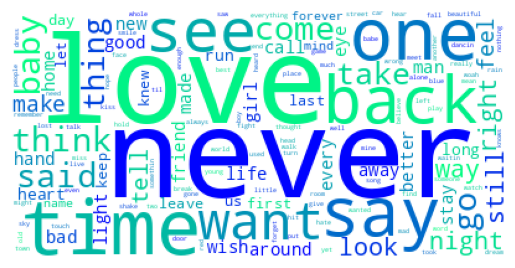

In [79]:
def gen_wordcloud(data, bg="white", cm="winter"):
    wordcloud = WordCloud(collocations=False, background_color=bg, colormap=cm).generate(' '.join(data))
    return wordcloud

all_wordcloud = gen_wordcloud(group_lyric['lyric_stripped'])
plt.imshow(all_wordcloud)
plt.axis('off')
plt.show()

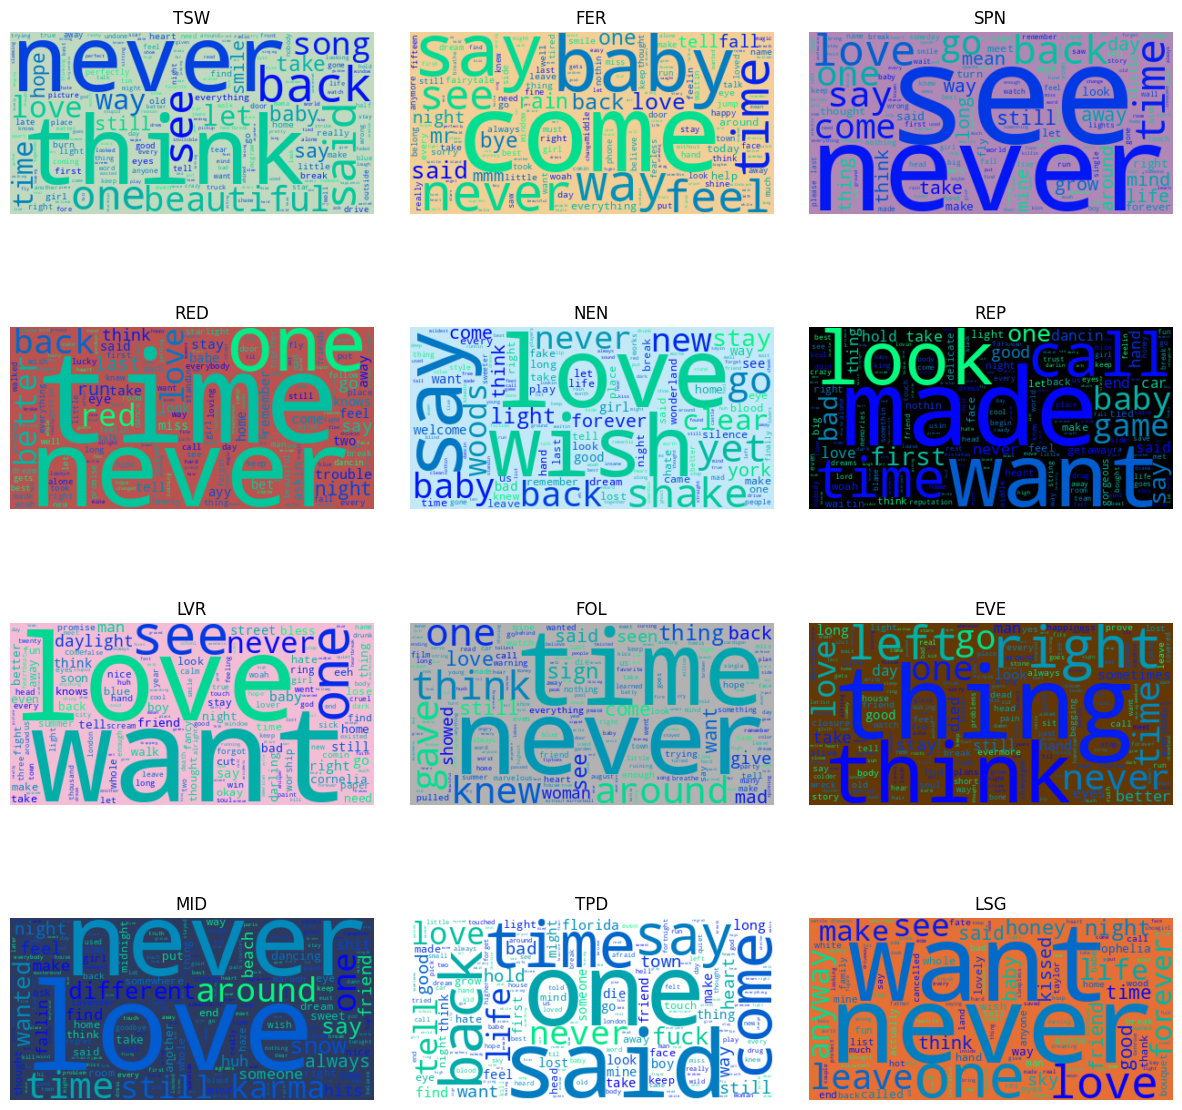

In [80]:
index=1
album = album_table['Code'][:-1]
plt.figure(figsize=(15,15))
for a in album:
    d = group_lyric[group_lyric['album_id'] == a]
    color = "#" + album_table.loc[album_table['Code'] == a, 'Color'].values[0]
    wordcloud = gen_wordcloud(d['lyric_stripped'], bg=color)
    plt.subplot(4,3,index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(a)
    index+=1
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [81]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

comp_score = []
sentiment = []

for i in group_lyric.loc[:,'lyric_stripped']:
    sentiment.append(sia.polarity_scores(i))

# Compound score is the sum of positive, negative & neutral scores
# which is then normalized between -1(most extreme negative) and +1 (most extreme positive).
group_lyric.loc[:,'sent_scores'] = sentiment
group_lyric.loc[:,'comp_score'] = group_lyric.loc[:,'sent_scores'].apply(lambda x: x['compound'])
group_lyric.loc[:,'sentiment'] = group_lyric.loc[:,'comp_score'].apply(lambda x: 'positive' if x>=0.5 else 'negative' if x<=-0.5 else 'neutral')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/giorgiaquarta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [83]:
all_song_sent = pd.DataFrame(group_lyric.groupby(['album_id', 'sentiment'])['track_id'].count())
all_song_sent.columns = ['song_count']
all_song_sent

all_song_sent = all_song_sent.reset_index()
all_song_sent = all_song_sent.sort_values(by=['album_id','song_count'], ascending = False)

fig = px.bar(all_song_sent, x = 'album_id', y = 'song_count', color = 'sentiment',
             labels = {'y':'No of songs','x':'Sentiment'},
             title = 'Top 100 Song Sentiments',
             height = 400, width = 900)
fig.show()

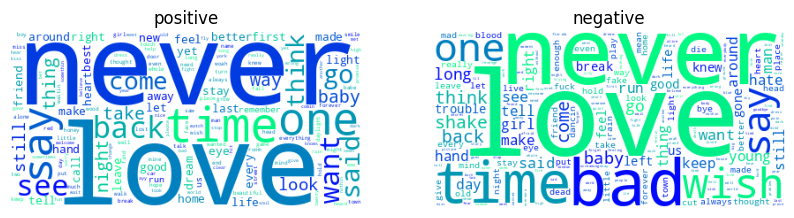

In [84]:
pos_songs = group_lyric[group_lyric['sentiment'] == 'positive']
neg_songs = group_lyric[group_lyric['sentiment'] == 'negative']

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
pos_wordcloud = gen_wordcloud(pos_songs['lyric_stripped'])
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.title('positive')

plt.subplot(1,2,2)
neg_wordcloud = gen_wordcloud(neg_songs['lyric_stripped'])
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.title('negative')

plt.show()

In [85]:
%pip install torch torchvision torchaudio


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install transformers

  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.6.2-cp38-abi3-macosx_11_0_arm64.whl.metadata (4.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-macosx_11_0_arm64.whl.metadata (4.9 kB)
Using cached transformers-4.57.1-py3-none-any.whl (12.0 MB)
Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
Using cached safetensors-0.6.2-cp38-abi3-macosx_11_0_arm64.whl (432 kB)
Using cached tokenizers-0.22.1-cp39-abi3-macosx_11_0_arm64.whl (2.9 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached hf_xet-1.2.0-cp37-abi3-macosx_11_0_arm64.whl (2.7 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pi

In [86]:
import torch
from transformers import pipeline

# --- 1. Load the Zero-Shot Classification Pipeline ---

# This will download and cache a model pretrained for zero-shot classification
# (e.g., 'facebook/bart-large-mnli')
# We specify device=0 to use the GPU if available.
# Use device=-1 for CPU.
device = 0 if torch.cuda.is_available() else -1

sentiment_classifier = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli",
    hypothesis_template = "the mood of this song is {}.",
    device=device
)

theme_classifier = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli",
    hypothesis_template = "this song is about {}.",
    device=device,
    multi_label=True
)

style_classifier = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/DeBERTa-v3-large-mnli-fever-anli-ling-wanli",
    hypothesis_template = "This text is written in a(n) {} style.",
    device=device
)

Device set to use cpu
Device set to use cpu
Device set to use cpu


In [87]:
sentiment_labels = ["positive", "negative", "neutral"]
theme_labels = ["love", "grief", "family", "friendship", "power", "self-worth", "revenge"]
style_labels = ["poetic", "casual", "quirky"]

In [ ]:
print("----- CLASSIFIER -----")
df = pd.DataFrame(columns=['album_id', 'track_id', 'sentiment', 'theme', 'style'])
group_lyric.reset_index()

for index, row in group_lyric.iterrows():
    song = row['lyric']
    print(f"classifying {row['album_id']}:{row['track_id']}")
    sentiment = sentiment_classifier(song, candidate_labels=sentiment_labels)['labels'][0]
    theme = theme_classifier(song, candidate_labels=theme_labels)['labels'][0]
    style = style_classifier(song, candidate_labels=style_labels)['labels'][0]
    df.loc[index] = [row['album_id'], row['track_id'], sentiment, theme, style]

print("Done!")

----- CLASSIFIER -----
classifying EVE:1


In [ ]:
df.head(50)